In [3]:
import pandas as pd
import os
import numpy as np
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
kick1 = pd.read_csv('kick1.dat', sep = ' ', header = None, names = ['x', 'y', 'z'])
kick2 = pd.read_csv('kick2.dat', sep = ' ', header = None, names = ['x', 'y', 'z'])

y1 = np.array(kick1['y'])
x1 = np.array(kick1['x'])
z1 = np.array(kick1['z'])

y2 = np.array(kick2['y'])
x2 = np.array(kick2['x'])
z2 = np.array(kick2['z'])

time = np.linspace(0, 1, 20)

print(z2)

[0.145 0.177 0.172 0.167 0.192 0.219 0.213 0.223 0.25  0.244 0.233 0.269
 0.283 0.29  0.263 0.29  0.28  0.281 0.296 0.269]


In [4]:
def gradiente_ssr(t, y, b):
    if(t.size != y.size):
        raise Exception("Os vetores t e y devem ter o mesmo tamanho.")
    
    res1 = 0
    res2 = 0
    for i in range(t.size):
        res1 += b[0] + b[1] * t[i] - y[i]
    for i in range(t.size):
        res2 += (b[0] + b[1]* t[i] - y[i]) * t[i]
    return res1/t.size, res2/t.size

def gradient_descente(gradient_ssr, t, y, coeff_start, learning_rate=0.1, n_iter=50, tolerance=1e-11):
    coeff_output = coeff_start
    for _ in range(n_iter):
        diff = -learning_rate * np.array(gradient_ssr(t, y, coeff_output))
        if np.all(np.abs(diff) <= tolerance):
            print(np.abs(diff))
            print(tolerance)
            break
        coeff_output += diff
    return coeff_output

def predict_points(coefficients, time):
    lin_function = lambda b0, b1, t: b0 + b1*t
    points_array = []
    for t in time:
        points_array.append(lin_function(coefficients[0], coefficients[1], t))
    return points_array


In [8]:
def loss_mse(ys, y_bar):
    return sum((ys - y_bar)*(ys - y_bar)) / len(ys)

def eval_1st_degree(coeffs, x):
    a = coeffs[0]*x
    b = coeffs[1]
    y = a+b
    return y
def eval_2nd_degree(coeffs, x):
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c
    return y
def eval_4th_degree(coeffs, x):
    a = (coeffs[0]*(x*x*x*x))
    b = (coeffs[1]*(x*x*x))
    c = (coeffs[2]*(x*x))
    d = (coeffs[3]*(x))
    e = coeffs[4]
    y = a+b+c+d+e
    return y

def calc_gradient_1st_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    a_s = []
    b_s = []
        
    y_bars = eval_1st_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)      
        partial_a = x * (y - y_bar)
        a_s.append(partial_a)
        partial_b = (y-y_bar)
        b_s.append(partial_b)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    
    new_model_coeffs = (a_new, b_new)
    
    new_y_bar = eval_1st_degree(new_model_coeffs, inputs_x)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    a_s = []
    b_s = []
    c_s = []
        
    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2        
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    
    new_model_coeffs = (a_new, b_new, c_new)
    
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar
def calc_gradient_4th_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
        
    y_bars = eval_4th_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_2 = x**2
        x_3 = x**3
        x_4 = x**4
        partial_a = x_4 * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_3 * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_2 * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x * (y - y_bar)
        d_s.append(partial_d)
        partial_e = 0
        e_s.append(partial_e)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    e_new = coeffs[4] - lr * gradient_e
    
    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new)
    
    new_y_bar = eval_4th_degree(new_model_coeffs, inputs_x)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

def gradient_descent(epochs, lr, x_inputs, y_outputs, polyDegree):
    losses = []
    if(polyDegree == 1):
        rand_coeffs_to_test = (random.randrange(-1, 0)/2, y_outputs[0])
        for i in range(epochs):
            loss = calc_gradient_1st_poly_for_GD(rand_coeffs_to_test, x_inputs, y_outputs, lr)
            rand_coeffs_to_test = loss[1]
            losses.append(loss[0])
        return loss[0], loss[1], loss[2], losses, rand_coeffs_to_test
    elif(polyDegree == 2):
        rand_coeffs_to_test = (random.randrange(-1, 0)/2, random.randrange(-1, 1)/2, y_outputs[0])
        for i in range(epochs):
            loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, x_inputs, y_outputs, lr)
            rand_coeffs_to_test = loss[1]
            losses.append(loss[0])
        return loss[0], loss[1], loss[2], losses, rand_coeffs_to_test
    elif(polyDegree == 4):
        for i in range(epochs):
            rand_coeffs_to_test = (random.randrange(-1, 1)/2, random.randrange(-1, 1)/2, random.randrange(-1, 1)/2, random.randrange(-1, 1)/2, y_outputs[0])
            loss = calc_gradient_4th_poly_for_GD(rand_coeffs_to_test, x_inputs, y_outputs, lr)
            rand_coeffs_to_test = loss[1]
            losses.append(loss[0])
        return loss[0], loss[1], loss[2], losses
    else:
        raise("Grau do polinômio inválido. Escolha grau 1, 2 ou 4.")
        
    


In [6]:
print(z2)
print(time)

[0.145 0.177 0.172 0.167 0.192 0.219 0.213 0.223 0.25  0.244 0.233 0.269
 0.283 0.29  0.263 0.29  0.28  0.281 0.296 0.269]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


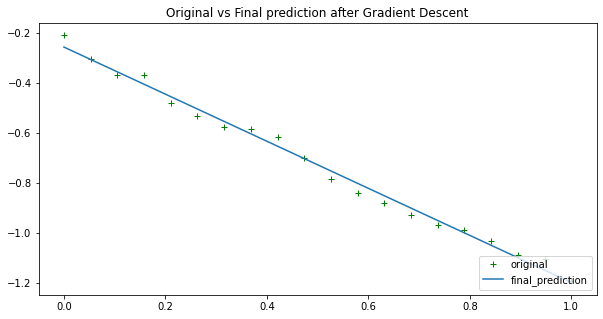

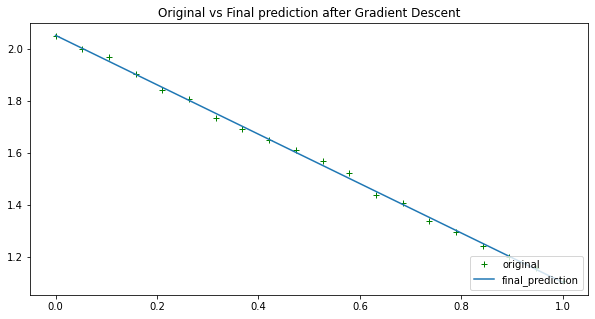

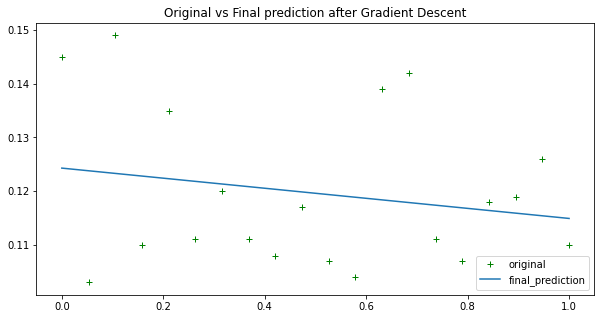

In [12]:
GD_x = gradient_descent(100000, 0.001, time, x1, 1)
time1 = np.linspace(0, 2, 20)
x1_predicted = eval_1st_degree(GD_x[1], time1)
#plt.figure(figsize=(20,10))
plt.figure(figsize=(10,5))
plt.plot(time, x1, 'g+', label = 'original')
plt.plot(time, GD_x[2], label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

GD_y = gradient_descent(100000, 0.001, time, y1, 1)
time1 = np.linspace(0, 2, 20)
y1_predicted = eval_1st_degree(GD_y[1], time1)
#plt.figure(figsize=(20,10))
plt.figure(figsize=(10,5))
plt.plot(time, y1, 'g+', label = 'original')
plt.plot(time, GD_y[2], label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

GD_z = gradient_descent(100000, 0.001, time, z1, 1)
time1 = np.linspace(0, 2, 20)
z1_predicted = eval_1st_degree(GD_z[1], time1)
#plt.figure(figsize=(20,10))
plt.figure(figsize=(10,5))
plt.plot(time, z1, 'g+', label = 'original')
plt.plot(time, GD_z[2], label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# dataset1 linear, linear, linear
coeff_y1 = gradient_descente(gradiente_ssr, time, y1, coeff_start=[y1[0], -.975], learning_rate=0.0000001, n_iter=100000)
coeff_x1 = gradient_descente(gradiente_ssr, time, x1, coeff_start=[x1[0], -1], learning_rate=0.0000001, n_iter=100000)
coeff_z1 = gradient_descente(gradiente_ssr, time, z1, coeff_start=[z1[0], -0.05], learning_rate=0.0000001, n_iter=100000)

y1_predicted = predict_points(coeff_y1, time)
x1_predicted = predict_points(coeff_x1, time)
z1_predicted = predict_points(coeff_z1, time)

plt.figure(figsize=(10,5))
plt.scatter(time, y1)
plt.plot(time, y1_predicted)
plt.show()
plt.scatter(time, x1)
plt.plot(time, x1_predicted)
plt.show()
plt.scatter(time, z1)
plt.plot(time, z1_predicted)
plt.show()

ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(x1, y1, z1);
ax.plot(x1_predicted, y1_predicted, z1_predicted)
plt.show()

In [ ]:
# dataset2 linear, linear, linear
coeff_y2 = gradient_descente(gradiente_ssr, time, y2, coeff_start=[y2[0], -.975], learning_rate=0.0000001, n_iter=100000)
coeff_x2 = gradient_descente(gradiente_ssr, time, x2, coeff_start=[x2[0], -.5], learning_rate=0.0000001, n_iter=100000)
coeff_z2 = gradient_descente(gradiente_ssr, time, z2, coeff_start=[z2[0], 0.13], learning_rate=0.0000001, n_iter=100000)

y2_predicted = predict_points(coeff_y2, time)
x2_predicted = predict_points(coeff_x2, time)
z2_predicted = predict_points(coeff_z2, time)

plt.figure(figsize=(10,5))
plt.scatter(time, y2)
plt.plot(time, y2_predicted)
plt.show()
plt.scatter(time, x2)
plt.plot(time, x2_predicted)
plt.show()
plt.scatter(time, z2)
plt.plot(time, z2_predicted)
plt.show()

ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(x2, y2, z2);
ax.plot(x2_predicted, y2_predicted, z2_predicted)
plt.show()

In [ ]:
# dataset1 2nd, 2nd, 2nd
for i in range(2):
    GD_x = gradient_descent(100000, 0.001, time, x1, 2)
    GD_y = gradient_descent(100000, 0.001, time, y1, 2)
    GD_z = gradient_descent(100000, 0.001, time, z1, 2)
    time1 = np.linspace(0, 2, 20)
    y1_predicted = eval_2nd_degree(GD_y[1], time1)
    x1_predicted = eval_2nd_degree(GD_x[1], time1)
    z1_predicted = eval_2nd_degree(GD_z[1], time1)
    #plt.figure(figsize=(20,10))
    plt.figure(figsize=(10,5))
    plt.plot(time, x1, 'g+', label = 'original')
    plt.plot(time, GD_x[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(time, y1, 'g+', label = 'original')
    plt.plot(time, GD_y[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(time, z1, 'g+', label = 'original')
    plt.plot(time, GD_z[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()

    ax = plt.axes(projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter3D(x1, y1, z1);
    ax.plot(x1_predicted, y1_predicted, z1_predicted)
    plt.show()

In [ ]:
# dataset2 2nd, 2nd, 2nd
for i in range(2):
    GD_x = gradient_descent(100000, 0.001, time, x2, 2)
    GD_y = gradient_descent(100000, 0.001, time, y2, 2)
    GD_z = gradient_descent(100000, 0.001, time, z2, 2)
    time1 = np.linspace(0, 2, 20)
    y2_predicted = eval_2nd_degree(GD_y[1], time1)
    x2_predicted = eval_2nd_degree(GD_x[1], time1)
    z2_predicted = eval_2nd_degree(GD_z[1], time1)
    #plt.figure(figsize=(20,10))
    plt.figure(figsize=(10,5))
    plt.plot(time, x2, 'g+', label = 'original')
    plt.plot(time, GD_x[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(time, y2, 'g+', label = 'original')
    plt.plot(time, GD_y[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(time, z2, 'g+', label = 'original')
    plt.plot(time, GD_z[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()

    ax = plt.axes(projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter3D(x2, y2, z2);
    ax.plot(x2_predicted, y2_predicted, z2_predicted)
    plt.show()

In [ ]:
# dataset1 4th, 4th, 4th
for i in range(2):
    GD_x = gradient_descent(100000, 0.001, time, x1, 4)
    GD_y = gradient_descent(100000, 0.001, time, y1, 4)
    GD_z = gradient_descent(100000, 0.001, time, z1, 4)
    time1 = np.linspace(0, 1, 20)
    y1_predicted = eval_4th_degree(GD_y[1], time1)
    x1_predicted = eval_4th_degree(GD_x[1], time1)
    z1_predicted = eval_4th_degree(GD_z[1], time1)
    #plt.figure(figsize=(20,10))
    plt.figure(figsize=(10,5))
    plt.plot(time, x1, 'g+', label = 'original')
    plt.plot(time, GD_x[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(time, y1, 'g+', label = 'original')
    plt.plot(time, GD_y[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(time, z1, 'g+', label = 'original')
    plt.plot(time, GD_z[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()

    ax = plt.axes(projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter3D(x1, y1, z1);
    ax.plot(x1_predicted, y1_predicted, z1_predicted)
    plt.show()

In [ ]:
# dataset2 4th, 4th, 4th
for i in range(2):
    GD_x = gradient_descent(100000, 0.001, time, x2, 4)
    GD_y = gradient_descent(100000, 0.001, time, y2, 4)
    GD_z = gradient_descent(100000, 0.001, time, z2, 4)
    time1 = np.linspace(0, 1, 20)
    y2_predicted = eval_4th_degree(GD_y[1], time1)
    x2_predicted = eval_4th_degree(GD_x[1], time1)
    z2_predicted = eval_4th_degree(GD_z[1], time1)
    #plt.figure(figsize=(20,10))
    plt.figure(figsize=(10,5))
    plt.plot(time, x2, 'g+', label = 'original')
    plt.plot(time, GD_x[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(time, y2, 'g+', label = 'original')
    plt.plot(time, GD_y[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(time, z2, 'g+', label = 'original')
    plt.plot(time, GD_z[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()

    ax = plt.axes(projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter3D(x2, y2, z2);
    ax.plot(x2_predicted, y2_predicted, z2_predicted)
    plt.show()

In [ ]:
# dataset1 linear, linear, 2nd
for i in range(5):
    time1 = np.linspace(0, 1, 20)
    coeff_y1 = gradient_descente(gradiente_ssr, time, y1, coeff_start=[y1[0], -.975], learning_rate=0.0000001, n_iter=100000)
    coeff_x1 = gradient_descente(gradiente_ssr, time, x1, coeff_start=[x1[0], -1], learning_rate=0.0000001, n_iter=100000)
    y1_predicted = predict_points(coeff_y1, time1)
    x1_predicted = predict_points(coeff_x1, time1)
    
    GD = gradient_descent(100000, 0.001, time, z1, 2)
    z1_predicted = eval_2nd_degree(GD[1], time1)
    #plt.figure(figsize=(20,10))
    
    plt.scatter(time, y1)
    plt.plot(time, y1_predicted)
    plt.show()
    plt.scatter(time, x1)
    plt.plot(time, x1_predicted)
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(time, z1, 'g+', label = 'original')
    plt.plot(time1, GD[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()

    ax = plt.axes(projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter3D(x1, y1, z1);
    ax.plot(x1_predicted, y1_predicted, z1_predicted)
    plt.show()

In [ ]:
# dataset1 linear, linear, 4th
for i in range(2):
    coeff_y1 = gradient_descente(gradiente_ssr, time, y1, coeff_start=[2.1, -.975], learning_rate=0.0000001, n_iter=100000)
    coeff_x1 = gradient_descente(gradiente_ssr, time, x1, coeff_start=[-.22, -1], learning_rate=0.0000001, n_iter=100000)
    GD = gradient_descent(100000, 0.001, time, z1, 4)
    time1 = np.linspace(0, 1, 20)
    y1_predicted = predict_points(coeff_y1, time1)
    x1_predicted = predict_points(coeff_x1, time1)

    z1_predicted = eval_4th_degree(GD[1], time1)
    #plt.figure(figsize=(20,10))
    
    plt.scatter(time, y1)
    plt.plot(time, y1_predicted)
    plt.show()
    plt.scatter(time, x1)
    plt.plot(time, x1_predicted)
    plt.show()
    
    
    print(GD[2])
    print(GD[1])
    plt.figure(figsize=(10,5))
    plt.plot(time, z1, 'g+', label = 'original')
    plt.plot(time, GD[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()

    ax = plt.axes(projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter3D(x1, y1, z1);
    ax.plot(x1_predicted, y1_predicted, z1_predicted)
    plt.show()

In [ ]:
# dataset2 linear, linear, 2nd
for i in range(10):
    coeff_y2 = gradient_descente(gradiente_ssr, time, y2, coeff_start=[y2[0], -.975], learning_rate=0.0000001, n_iter=100000)
    coeff_x2 = gradient_descente(gradiente_ssr, time, x2, coeff_start=[x2[0], -.5], learning_rate=0.0000001, n_iter=100000)
    GD = gradient_descent(100000, 0.0001, time, z2, 2)
    
    time2 = np.linspace(0, 2, 20)
    y2_predicted = predict_points(coeff_y2, time2)
    x2_predicted = predict_points(coeff_x2, time2)
    z2_predicted = eval_2nd_degree(GD[1], time2)
    #plt.figure(figsize=(20,10))
    
    print(GD[2])
    print(GD[1])
    
    plt.scatter(time, y2)
    plt.plot(time, predict_points(coeff_y2, time))
    plt.show()
    plt.scatter(time2, x2)
    plt.plot(time2, predict_points(coeff_x2, time))
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(time, z2, 'g+', label = 'original')
    plt.plot(time, GD[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()

    ax = plt.axes(projection='3d')
    ax.set_xlim3d(-3, 3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter3D(x2, y2, z2);
    ax.plot(x2_predicted, y2_predicted, z2_predicted)
    plt.show()

In [ ]:
# dataset2 linear, linear, 4th
for i in range(2):
    coeff_y2 = gradient_descente(gradiente_ssr, time, y2, coeff_start=[y2[0], -.975], learning_rate=0.0000001, n_iter=100000)
    coeff_x2 = gradient_descente(gradiente_ssr, time, x2, coeff_start=[x2[0], -.5], learning_rate=0.0000001, n_iter=100000)
    GD = gradient_descent(100000, 0.0001, time, z2, 4)
    time2 = np.linspace(0, 1, 20)
    y2_predicted = predict_points(coeff_y2, time2)
    x2_predicted = predict_points(coeff_x2, time2)

    z2_predicted = eval_4th_degree(GD[1], time2)
    #plt.figure(figsize=(20,10))
    print(GD[2])
    print(GD[1])
    
    plt.scatter(time, y2)
    plt.plot(time, y2_predicted)
    plt.show()
    plt.scatter(time, x2)
    plt.plot(time, x2_predicted)
    plt.show()
    
    
    plt.figure(figsize=(10,5))
    plt.plot(time, z2, 'g+', label = 'original')
    plt.plot(time, GD[2], 'b.', label = 'final_prediction')
    plt.title('Original vs Final prediction after Gradient Descent')
    plt.legend(loc="lower right")
    plt.show()

    ax = plt.axes(projection='3d')
    ax.set_xlim3d(-3, 3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter3D(x2, y2, z2);
    ax.plot(x2_predicted, y2_predicted, z2_predicted)
    plt.show()